# Reading text

In this notebook, we'll practice reading text files and transforming them into word counts.

In doing that we'll also practice some basic structural aspects of Python.

* I/O using absolute and relative file paths
* Two new data structures: the dictionary and Counter.
* The idea of a *module*.

We will eventually learn how to abbreviate some of these operations with the ```nltk``` module. But I think it's useful to do it slowly at first, so you get a good grasp on Python's underlying data structures.


## I. Reading text

### a. absolute and relative paths

When you're working at the command line, your location in the folder hierarchy is represented by a series of directory names separated by slashes. If you're in OS X, for instance and you type

    > pwd

you'll get a string that represents the current "working directory," like,

    /Users/tunder/Dropbox/courses/2017datasci/code

In Windows, the slashes go the other way, so this might be

    > cd
    C:\Users\tunder\Dropbox\courses\2017datasci\code
   
This is called a *path.* In this case, it's a path to a directory. If we wanted to name a specific file in the directory, we could provide the path plus a filename, such as

    /Users/tunder/Dropbox/courses/2017datasci/code/ex2readingtext.ipynb
   
which is the location of this file on my machine.

These are *absolute paths* because they start from the root of the folder hierarchy and contain all the information needed to locate the file. In writing this notebook, however, I don't know your user name, or exactly where you've put our course folder on your machine. So I'm going to try to use *relative paths* to point to files.

In this case, for instance, I know that your python notebooks are in a folder named ```code```, and your data files are living in a folder next to that one, named ```data```. So if I wanted to point to a file in the ```data``` folder, I might say,

    ../data/exampledata.txt

You'll recall that ```cd ..``` moves you up a level in the folder hierarchy. So the function of the ```..``` in the relative path is to move us up a level in the hierarchy, to the parent course folder. Then ```data``` moves us back down to the data folder, and ```exampledata.txt``` is an (imaginary) data file.

The only problem with this system is that it won't work on Windows. The slashes would need to go the other way. So let's make use of a special Python tool that can get around that hassle, the *module* ```os```. A module is a collection of pieces of Python code. If you want to use one or more of those pieces, you can *import* the module. The ```os``` module contains tools that can be used to manipulate your operating system. So, for instance,


In [1]:
import os
relativepath = os.path.join('..', 'data', 'firstcorpus', 'ShelleyFrankenstein.txt')
print(relativepath)

../data/firstcorpus/ShelleyFrankenstein.txt


The result you get by running that code will depend on the operating system you're running. If you run it under Windows, you'll get slashes pointing the other direction.

Now let's use this relative path to open a file

### b. text input

When you're reading or writing from a file, it's important to close the file when you're done. There are ways to do that manually, but generally it's simpler and more reliable to use Python's *context manager,* an indented block of code that begins with the key word ```with```. For instance,



In [2]:
import os
relativepath = os.path.join('..', 'data', 'firstcorpus', 'ShelleyFrankenstein.txt')

list_of_lines = list()

with open(relativepath, mode = 'r', encoding = 'utf-8') as f:
    for line in f:
        print(line)
        user_wish = input('continue? ')
        if user_wish == 'n':
            break
        else:
            list_of_lines.append(line)
        
print(len(list_of_lines))    

The Project Gutenberg EBook of Frankenstein, by Mary W. Shelley

continue? 


continue? khgf
This eBook is for the use of anyone anywhere at no cost and with

continue? n
2


When you run that code, it should allow you to step through the Project Gutenberg text of *Frankenstein* line by line. The process will continue each time you hit ```Enter``` and stop only if your reply to ```continue?``` is ```n```.

Take a moment to think about how this works, following the program line by line.

The ```with``` statement opens the file identified by ```relativepath```. The mode is set to ```r```, for read. Other possible modes are ```w```rite and ```a```ppend. It puts the file in a file object named ```f```. Then we can simply use a ```for``` loop to step through the file line by line. The loop will proceed through the whole file unless we ```break``` it. The ```break``` statement always escapes from the most recently-enclosing loop.

Once you've escaped from the loop, the next statement will execute. In this case it simply prints the number of lines you gathered. If you wanted to gather them all at once, you wouldn't need a loop. Instead you could just say

    list_of_lines == f.readlines()

### c. tokenizing text.

Right now we're looking at the file as a list of lines. But in reality, to do data science on text, we usually want to count individual words — or, word-like objects (numbers, etc). We can call these objects generally *tokens,* and the process of transforming text into a list of tokens is called *tokenizing.*

In the last class we met the 'split' function, which gets us part of the way there, relying on the fact that English words are generally divided by white space.

In [7]:
firstline = 'The Project Gutenberg EBook of Frankenstein, by Mary W. Shelley'
tokens = firstline.split()
print(tokens)

['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Frankenstein,', 'by', 'Mary', 'W.', 'Shelley']


That's a list of tokens, but not exactly a list of words. You'll notice, for instance, that there's punctuation attached to "Frankenstein," and "W."

But still it's good enough to give us a rough estimate of the number of words in a file.

### Exercise 1. Counting tokens.

Use the code we developed above to count the total number of tokens in *Frankenstein.* For the moment, we'll define a token simply as a sequence of characters separated by whitespace.

In [3]:
# Code for Exercise 1.

import os
relativepath = os.path.join('..', 'data', 'firstcorpus', 'ShelleyFrankenstein.txt')

number_of_tokens = 0

with open(relativepath, mode = 'r', encoding = 'utf-8') as f:
    for line in f:
        tokens = line.split()
        number_of_tokens += len(tokens)

print('The file contained {0} tokens.'.format(number_of_tokens))

The file contained 80989 tokens.


Notice that strings have a ```format``` method that can be used when you need to provide variables to "fill in" certain "blanks."

### d. the glob module.

Suppose we wanted to know the number of words for all the files in the ```firstcorpus``` folder. Instead of writing a separate piece of code for each one, we would probably use a loop. So we need,

* first, a list of all the files in the folder, and
* then, for each file, do the same thing we did above for *Frankenstein*

Try this in

### Exercise 2: reading all the files in a folder.

I'll give you the code to get a list of files in a folder. This makes use of the ```glob``` module. Then, once we have a list of paths to all the files, you can take it from there, building a new ```for``` loop and pasting some code from above. Count the words for each file, and print the number of words next to the file path.


In [5]:
# Code for exercise 2.

import os, glob
relativepath = os.path.join('..', 'data', 'firstcorpus', '*.txt')
print(relativepath)
textfilepaths = glob.glob(relativepath)
print(textfilepaths)

for apath in textfilepaths:
    number_of_tokens = 0

    with open(apath, mode = 'r', encoding = 'utf-8') as f:
        for line in f:
            tokens = line.split()
            number_of_tokens += len(tokens)
    print(apath, number_of_tokens)


../data/firstcorpus/*.txt
['../data/firstcorpus/AustenPride.txt', '../data/firstcorpus/DickinsonPoems.txt', '../data/firstcorpus/EliotPrufrock.txt', '../data/firstcorpus/ShelleyFrankenstein.txt', '../data/firstcorpus/StokerDracula.txt', '../data/firstcorpus/WordsworthLyrical.txt']
../data/firstcorpus/AustenPride.txt 124592
../data/firstcorpus/DickinsonPoems.txt 10546
../data/firstcorpus/EliotPrufrock.txt 6871
../data/firstcorpus/ShelleyFrankenstein.txt 80989
../data/firstcorpus/StokerDracula.txt 164428
../data/firstcorpus/WordsworthLyrical.txt 24497


## II. Word frequencies.

Counting the *total* number of words in a text doesn't tell us very much. Usually when we're working with text, we'll want to know the frequencies of *specific* words. 

When we start counting words, we're going to need to produce a data structure that's a little more complex than a list. We need a *mapping* between words and numbers. So, for instance, here are some frequencies in this paragraph:

    a : 4
    here : 1
    going : 1
    so : 1
    for : 1
    to : 2
    words : 2

When we need to represent a *mapping* in Python, we usually create a *dictionary.* A dictionary maps a key to a value. So, for instance

In [18]:
colors = dict()
colors['apple'] = 'red'
colors['banana'] = 'yellow'
print(colors)
print(colors['banana'])

{'apple': 'red', 'banana': 'yellow'}
yellow


Putting a key in square brackets after the dictionary name gets you the value for that key. But notice what happens if you try a key that hasn't been entered.

In [19]:
colors['guava']

KeyError: 'guava'

Notice also that the brackets have to be square. If you use parentheses, Python will think you're trying to *call* a function.

In [20]:
colors('apple')

TypeError: 'dict' object is not callable

We can count word frequencies by mapping each word to the number of times it has occurred in the text. We iterate through the text, and each time we see a word, we add one to its value in the wordcount dictionary. The only problem is, we can't add one if it's not yet in the dictionary! We would get a key error, as seen above. So when you use a dictionary to count things, you have to check whether the key is already in the dictionary. An if-else statement is handy here. Follow the logic below. Try deleting the line

    w = w.lower().strip(',.* ')
    
and see how the results change.

In [7]:
paragraph = "When we start counting words, we're going to need to produce a data structure that's a little more complex than a list. We need a *mapping* between words and numbers. So, for instance, here are some frequencies in this paragraph:"
wordcounts = dict()
for w in paragraph.split():
    w = w.lower()
    w = w.strip('\n,.* "\'')
    if w not in wordcounts:
        wordcounts[w] = 1
    else:
        wordcounts[w] = wordcounts[w] + 1

# You cannot iterate through a dictionary quite as simply as if it were
# a list. Instead of individual elements, you want (key, value) pairs.
# To get them you can iterate through the dictionary's ```items``` method.
# Note that a method has to be followed by () parentheses, even when it
# takes no argument.

for word, count in wordcounts.items():
    print(word + " : " + str(count))

some : 1
So, : 1
that's : 1
between : 1
instance, : 1
need : 2
words, : 1
more : 1
list. : 1
to : 2
data : 1
produce : 1
complex : 1
are : 1
going : 1
When : 1
and : 1
than : 1
*mapping* : 1
we : 1
for : 1
paragraph: : 1
little : 1
a : 4
words : 1
in : 1
we're : 1
frequencies : 1
here : 1
numbers. : 1
structure : 1
start : 1
We : 1
counting : 1
this : 1


To save ourselves the labor of checking whether a word is in the dictionary yet, we can use a ```Counter,``` a convenient data structure in the ```collections``` module. Instead of returning a KeyError when you ask for a key that doesn't exist yet, a Counter returns 0. So you can skip the if-else and just start by adding one to the default value of 0.

Another nice feature of ```Counters``` is that they have a ```most_common()``` method that gives you a sorted list of the keys with the highest values. In the code below, we use that feature to identify the five most frequent words.

In [22]:
from collections import Counter

paragraph = "When we start counting words, we're going to need to produce a data structure that's a little more complex than a list. We need a *mapping* between words and numbers. So, for instance, here are some frequencies in this paragraph:"
wordcounts = Counter()
for w in paragraph.split():
    w = w.lower().strip(',.* ')
    wordcounts[w] = wordcounts[w] + 1

topfive = wordcounts.most_common(5)
print(topfive)

[('a', 4), ('we', 2), ('need', 2), ('to', 2), ('words', 2)]


Notice that each element of the list ```topfive``` is a pair of items enclosed in parentheses. This is actually an example of a new data structure, a **tuple.** A tuple is basically an immutable list. You can't append to it, but there are some nice tricks you can perform, especially something called *tuple packing*, which allows you to turn a series of items separated by a comma into a single object, and then unpack it again into multiple objects. 

In [44]:
a_tuple = ('need', 2)
word, frequency = a_tuple
print(word)

need


### Exercise 3. Word frequencies.

Adapt your code from Exercise 1 so that, instead of just counting the total number of words in *Frankenstein,* you identify the most common 100 words. Include a line like

    w = w.lower().strip(',.*"-—() ')

so that we don't count words separately when they're only distinguished by capitalization or punctuation.

Put the list of ```most_common()``` words in a list called ```tophundred```. Print the first ten items from ```tophundred```.


In [12]:
# Code for Exercise 3.
from collections import Counter
relativepath = os.path.join('..', 'data', 'firstcorpus', 'StokerDracula.txt')

wordcounts = Counter()

with open(relativepath, mode = 'r', encoding = 'utf-8') as f:
    for line in f:
        for w in line.split():
            w = w.lower().strip(',.* ()-_–[]')
            wordcounts[w] = wordcounts[w] + 1

tophundred = wordcounts.most_common(100)

print(tophundred[0:10])

[('the', 7989), ('and', 5841), ('i', 4535), ('to', 4525), ('of', 3727), ('a', 2945), ('in', 2531), ('he', 2525), ('that', 2424), ('it', 2011)]


## III. A bit of exploratory data visualization.

Now we can start to explore the data, to get a sense of its shape. One simple thing to do is to plot the raw word counts for the first hundred words. To do this we need to use a module called matplotlib.

Python has a lot of pretty and elegant features. Its syntax for visualization is not really one of them. We have to say ```%matplotlib inline``` as a kind of magic word that permits graphs to be displayed in a Jupyter notebook. Then we import a specific subset of matplotlib called "pyplot." We rename it ```plt```, for a shorter convenience name. Then we pass ```plt```'s plot method a list of numbers, which it treats as the y axis values. (If x values aren't provided, it assumes by default that we want a sequence of integers, which in this case is exactly what we do want.) Finally, we have to say ```plt.show()``` to make the image actually appear.

This crude visualization is already revealing something pretty fundamental about the way word frequencies behave. Try the same exercise with *Pride and Prejudice.* (You'll have to rerun Exercise 3, using a different file name, and then re-run the visualization code above.)

You have just discovered [Zipf's Law.](https://en.wikipedia.org/wiki/Zipf's_law)

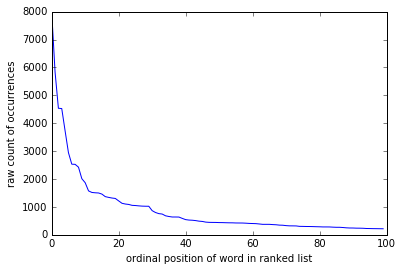

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

justcounts = [x[1] for x in tophundred]
plt.plot(justcounts)
plt.ylabel('raw count of occurrences')
plt.xlabel('ordinal position of word in ranked list')
plt.show()

The rules for creating visualizations are pretty hard to systematize, because there are an endless number of knobs that people may want to tune to control the appearance of an image. You might want to browse through [an initial pyplot tutorial,](http://matplotlib.org/users/pyplot_tutorial.html) but I have to confess that in practice I learn these things in an ad-hoc fashion: I usually Google around to learn a particular trick when I have a project that requires it.

There are a few general patterns worth knowing, however. For instance, you can change the plot from a line graph to a series of data points by providing a code that indicates the color and shape for points. The first character determines the color, the second the shape of the point.

    ro = red circles
    bo = blue circles
    k+ = black crosses
    g-- = green dashes
    ms = magenta squares
    
    

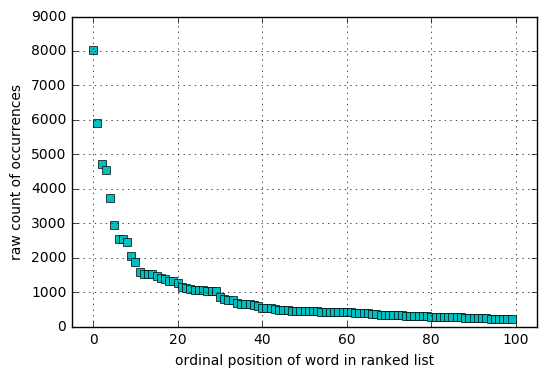

In [53]:
plt.xlim((-5, 105))
# that option defines the limits of the x axis; here I've
# set it manually to give us extra space on either side

plt.plot(justcounts, 'cs')
# let's use cyan squares!

plt.ylabel('raw count of occurrences')
plt.xlabel('ordinal position of word in ranked list')

plt.grid(True)
# turning on grid lines
plt.show()

### Exercise 4: if you have extra time.

Play around a bit with the code above to change the color and shape of the points, the axis labels, and the limits of the y or x axes.